In [29]:
import numpy as np
import rasterio as rio
from rasterio.crs import CRS
from affine import Affine
from matplotlib import pyplot
%matplotlib inline
import os

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 360, 'height': 180, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(1.0, 0.0, -180.0,
       0.0, -1.0, 90.0), 'blockxsize': 128, 'blockysize': 128, 'compress': 'lzw', 'interleave': 'band', 'tiled': True}
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


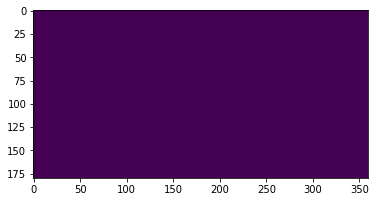

In [86]:
# Create array of ones size of a global, 1 degree raster
dst_array = np.ones((360, 180), dtype=np.float32)
#dst_array = np.random.randn(360, 180).astype(np.float32)
#print(dst_array)
# Use rasterio to classify this as WGS84 EPSG:4326
world_array = '/Users/nathansuberi/Desktop/RW_Data/world_array.tif'
profile = {
    'driver': 'GTiff', 
    'dtype': np.float32, 
    'nodata': 0, 
    'width': 360, 
    'height': 180, 
    'count': 1, 
    'crs': CRS({'init': 'EPSG:4326'}), 
    'transform':Affine(1, 0, -180, 0, -1, 90),
    'blockxsize': 128, 
    'blockysize': 128, 
    'tiled': True, 
    'compress': 'lzw', 
    'interleave': 'band'
}
with rio.open(world_array, "w", **profile) as dst:
    dst.write(dst_array, indexes=1)

# Print, observe
with rio.open(world_array, "r") as src:
    data = src.read(indexes=1)
    print(src.profile)
    print(data)
pyplot.imshow(data)

In [97]:
# Define alternate projection
alt_proj = "EPSG:54009"

Creating output file that is 360P x 180L.
Processing input file /Users/nathansuberi/Desktop/RW_Data/world_array.tif.
Using internal nodata values (e.g. 0) for image /Users/nathansuberi/Desktop/RW_Data/world_array.tif.
Copying nodata values from source /Users/nathansuberi/Desktop/RW_Data/world_array.tif to destination /Users/nathansuberi/Desktop/RW_Data/world_array_edit.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 360, 'height': 180, 'count': 1, 'crs': CRS({'proj': 'moll', 'lon_0': 0, 'x_0': 0, 'y_0': 0, 'ellps': 'WGS84', 'units': 'm', 'no_defs': True}), 'transform': Affine(100222.6315252748, 0.0, -18040068.169145808,
       0.0, -100222.6315252748, 9020047.848073646), 'tiled': False, 'interleave': 'band'}
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


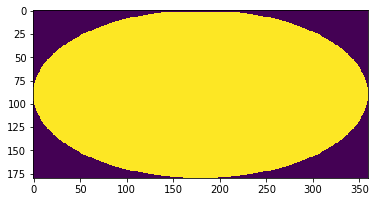

In [104]:
# Use gdal to re-project as Mollweide EPSG:54009
os.environ["Zsrc_file"] = world_array
world_array_edit = world_array[:-4] + "_edit.tif"
os.environ["Zdst_file"] = world_array_edit
os.environ["Zoptions"] = "-r near -s_srs EPSG:4326 -t_srs "+alt_proj+" -of GTiff -overwrite"
!gdalwarp $Zoptions $Zsrc_file $Zdst_file

# Print, observe
with rio.open(world_array_edit, "r") as src:
    data = src.read(indexes=1)
    print(src.profile)
    print(data)
    print(np.mean(data))
    
pyplot.imshow(data)
!gdalinfo $Zdst_file

ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: latitude or longitude exceeded limits
ERROR 1: Reprojection failed, err = -14, further errors will be suppressed on the transform object.
Creatin

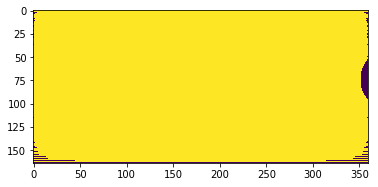

In [108]:
# Use gdal to re-project as WGS84 EPSG:4326
os.environ["Zsrc_file"] = world_array_edit
world_array2 = world_array[:-4] + "2.tif"
os.environ["Zdst_file"] = world_array2 

os.environ["Zoptions"] = "-s_srs "+alt_proj+" -t_srs EPSG:4326 -of GTiff -overwrite"
os.environ["Zoptions_with_tr"] = "-r near -s_srs "+alt_proj+" -t_srs EPSG:4326 -of GTiff -overwrite -tr 1 1"
#!gdalwarp $Zoptions $Zsrc_file $Zdst_file
!gdalwarp $Zoptions_with_tr $Zsrc_file $Zdst_file

# Print, observe
with rio.open(world_array2, "r") as src:
    data = src.read(indexes=1)
    print(src.profile)
    print(data)
    print(np.mean(data))
    
pyplot.imshow(data)
!gdalinfo $Zdst_file

Creating output file that is 360P x 180L.
Processing input file /Users/nathansuberi/Desktop/RW_Data/world_array.tif.
Using internal nodata values (e.g. 0) for image /Users/nathansuberi/Desktop/RW_Data/world_array.tif.
Copying nodata values from source /Users/nathansuberi/Desktop/RW_Data/world_array.tif to destination /Users/nathansuberi/Desktop/RW_Data/world_array3.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 360, 'height': 180, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(1.0, 0.0, -180.0,
       0.0, -1.0, 90.0), 'tiled': False, 'interleave': 'band'}
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
1.0
Driver: GTiff/GeoTIFF
Files: /Users/nathansuberi/Desktop/RW_Data/world_array3.tif
Size is 360, 180
Coordinate System is:
GEOGCS["W

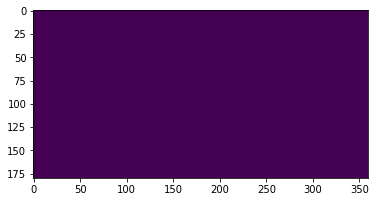

In [100]:
# Use gdal to re-project as WGS84 EPSG:4326
os.environ["Zsrc_file"] = world_array
world_array3 = world_array[:-4] + "3.tif"
os.environ["Zdst_file"] = world_array3
os.environ["Zoptions"] = "-s_srs EPSG:4326 -t_srs EPSG:4326 -of GTiff -overwrite"
!gdalwarp $Zoptions $Zsrc_file $Zdst_file

# Print, observe
with rio.open(world_array3, "r") as src:
    data = src.read(indexes=1)
    print(src.profile)
    print(data)
    print(np.mean(data))
    
pyplot.imshow(data)
!gdalinfo $Zdst_file

In [200]:
### Create areal weighted rasters
# https://waterprogramming.wordpress.com/2015/06/09/using-arcpy-to-calculate-area-weighted-averages-of-gridded-spatial-data-over-political-units-part-2/
# http://pythonhosted.org/rasterstats/cli.html
# http://mathforum.org/library/drmath/view/63767.html

# https://stackoverflow.com/questions/41826750/calculating-the-area-of-gridded-data-equidistant-in-degrees
# http://unidata.github.io/netcdf4-python/#section1
from netCDF4 import Dataset
import numpy as np

# Create netcdf from scratch
os.chdir("/Users/nathansuberi/Desktop/RW_Data/")
Data = Dataset("./one_degree_raster_with_cell_areas20.nc", mode="w")

num_cols = 360
num_rows = 180

Data.createDimension("dim_latitude", num_rows*num_cols)
Data.createDimension("dim_longitude", num_cols*num_rows)

col_lats = [np.repeat(i, num_rows) for i in np.arange(-180, 180, 1)]
# Need to squeeze this?

row_lons = [np.arange(90, -90, -1)]*num_cols

lats = Data.createVariable('latitude', 'f4', 'dim_latitude')
lons = Data.createVariable('longitude', 'f4', 'dim_longitude')
#Data.variables['latitude'] = np.reshape(col_lats, -1)
lats = np.reshape(col_lats, -1)
#Data.variables['longitude'] = np.reshape(row_lons, -1)
lons = np.reshape(row_lons, -1)

#VAR = np.squeeze(np.squeeze(Data.variables['REPLACE WITH VALID VARIABLE NAME'][:]))

#Lat = Data.variables['latitude'][:]
Lat = lats
#Lon = Data.variables['longitude'][:]
Lon = lons

# print(Lat)

AREA_VAR = np.empty(len(Lat))

# Equation for area of a lat-lon rectangle
R = 6371.

resolution = 1
for i in range(0,360, resolution):
    for j in range(0,180, resolution):  #just northern hemisphere
        
        place = (i*180)+j
        
        lat1=Lat[place]
        lon1=Lon[place]
        if i == 359:
            lat2 = 180
        else:
            lat2 = Lat[place+1]
        
        if j == 179:
            lon2 = -90
        else:
            lon2 = Lon[place+1]

        # print(np.pi)
        # print(np.sin(lat1))
#         print(np.sin(lat2))
#         print(np.abs(lon1-lon2))
#         print(np.abs(np.sin(lat1)-np.sin(lat2)))
#         print((np.pi/180)*(R**2))
        area = (np.pi/180.)*(R**2)*np.abs(np.sin(lat1)-np.sin(lat2))*np.abs(lon1-lon2)
#         print(area)
#         lower_boundary = 0.15
#         upper_boundary = 1.0
#         if VAR[j,i] > lower_boundary and VAR[j,i] <= upper_boundary:
        #cell_area[i,j] = R*np.cos(np.radians(Lat[j]))
        AREA_VAR[place] = area
            
Data.createVariable('cell_area', 'f4', 'dim_longitude')            
Data.variables["cell_area"] = AREA_VAR
print(AREA_VAR)
print(Data.variables["cell_area"])
Data.close()
# Bring in Thomas' formula

[      0.              0.              0.        ...,  617656.0568747
  617656.0568747  617656.0568747]
[      0.              0.              0.        ...,  617656.0568747
  617656.0568747  617656.0568747]


In [187]:
359*360 + 180

129420

In [202]:
Read_data = Dataset("./one_degree_raster_with_cell_areas20.nc", "r+")
Read_data.variables["cell_area"]
areas = Read_data.variables["cell_area"][:]
areas

masked_array(data = [-- -- -- ..., -- -- --],
             mask = [ True  True  True ...,  True  True  True],
       fill_value = 9.96921e+36)

In [117]:
col_ids = np.arange(-180, 180, 1)
row_ids = np.arange(90, -90, -1)

# col_ids represent upper right x of upper left corner of raster
# row_ids represent upper right y of upper left corner of raster

row_ids

array([ 90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
        51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0,
        -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12, -13,
       -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26,
       -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39,
       -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52,
       -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65,
       -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78,
       -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89])

In [113]:
np.pi

3.141592653589793

In [111]:
# How to configure transforms for rasters??

def create_transform(row_width,row_rotation, upper_right_x,
                    column_rotation, column_height, upper_right_y):
    
    return(Affine(row_width,row_rotation,upper_right_x,
                  column_rotation, column_height, upper_right_y))

row_width=0
column_height=0
row_rotation=0
column_rotation=0
upper_right_x=-180
upper_right_y=90

degree1 = create_transform(1,0,-180,0,-1,90)
arcminutes30 = create_transform(.5,0,-180,0,-.5,90)
arcminutes15 = create_transform(.25,0,-180,0,-.25,90)
arcminutes5 = create_transform(0.0833333,0,-180,0,-0.0833333,90)
arcminutes3 = create_transform(row_width,0,-180,0,column_height,90)
arcminutes1 = create_transform(0.0166667,0,-180,0,-0.0166667,90)
arcseconds30 = create_transform(0.00833333,0,-180,-0,0.00833333,90)
arcseconds15 = create_transform(0.00416667,0,-180,-0,0.00416667,90)
arcseconds5 = create_transform(0.00138889,0,-180,0,-0.00138889,90)
arcseconds3 = create_transform(row_width,0,-180,0,column_height,90)
arcseconds1 = create_transform(0.0166667,0,-180,0,-0.0166667,90)

Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0)

In [203]:
### Use WFP Logistics Cluster data - create a raster
# 1 = WFP deployment to an area
# 0 = no WFP deployment to an area
# Divide up by month into many rasters, can use as training data labels
# Add in geocoded "Who does what where" from reliefweb
# Try to use GDELT as training data inputs

# Can 1Concern help here?